In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# libraries for data preprocessing 
import statsmodels.api as sm
import scipy.stats as stats



In [2]:
# import dataset

file = r'E:/1 PROJECT/RESEARCH PROJECTS/HTJ res/influenza/Data/csv_work040224.xlsx'
df = pd.read_excel(file)

Empty DataFrame
Columns: [ID, Dateofbirth, Dateofadmission, Dateofdischarge, diagnosis, NPAIFCertestQiastat, MaleSex, Ethinicty, Malay, Chinese, Indian, SubGroup, Group, COVID19, FluA, FluB, Influenzavaccinationinpastyear, Covidvaccinationstatus, PasthistoryofCOVIDinfection, sickcontact , SickContactChild, SickContactAdult, Anycomorbidities, ComorbidityObesity, ComorbidityExpremature, ComorbidityRespi, ComorbidityNeuromuscular, ComorbidityCardio, ComorbidityGenetic, ComorbidityRenal, ComorbidityOthers, Fever, Cough, Rhinorrhea, Sorethroat, Seizures, Vomiting, Diarrhea, Abdominalpain, Myalgia, Headache, Rashes, AnosmiaAgeusia, clinicalphenotype, Viralfever, URTI, Croup, LRTI, AEBA, FebrileSeizure, AGE, shock, Tachypnea, respidistress, Spo2Less92, Respifindings, CrepitationsRhonchi, Stridor, Hepatomegaly/splenomegaly, Abdominal tenderness/guarding, Exanthem, bloodIx, IVfluids, IVantibiotics, MDIsalbutamol, Steroids , IVIG, PICU, Oxygen, Highestventilation, Inotropes, PRBC, AntiviralsRemd

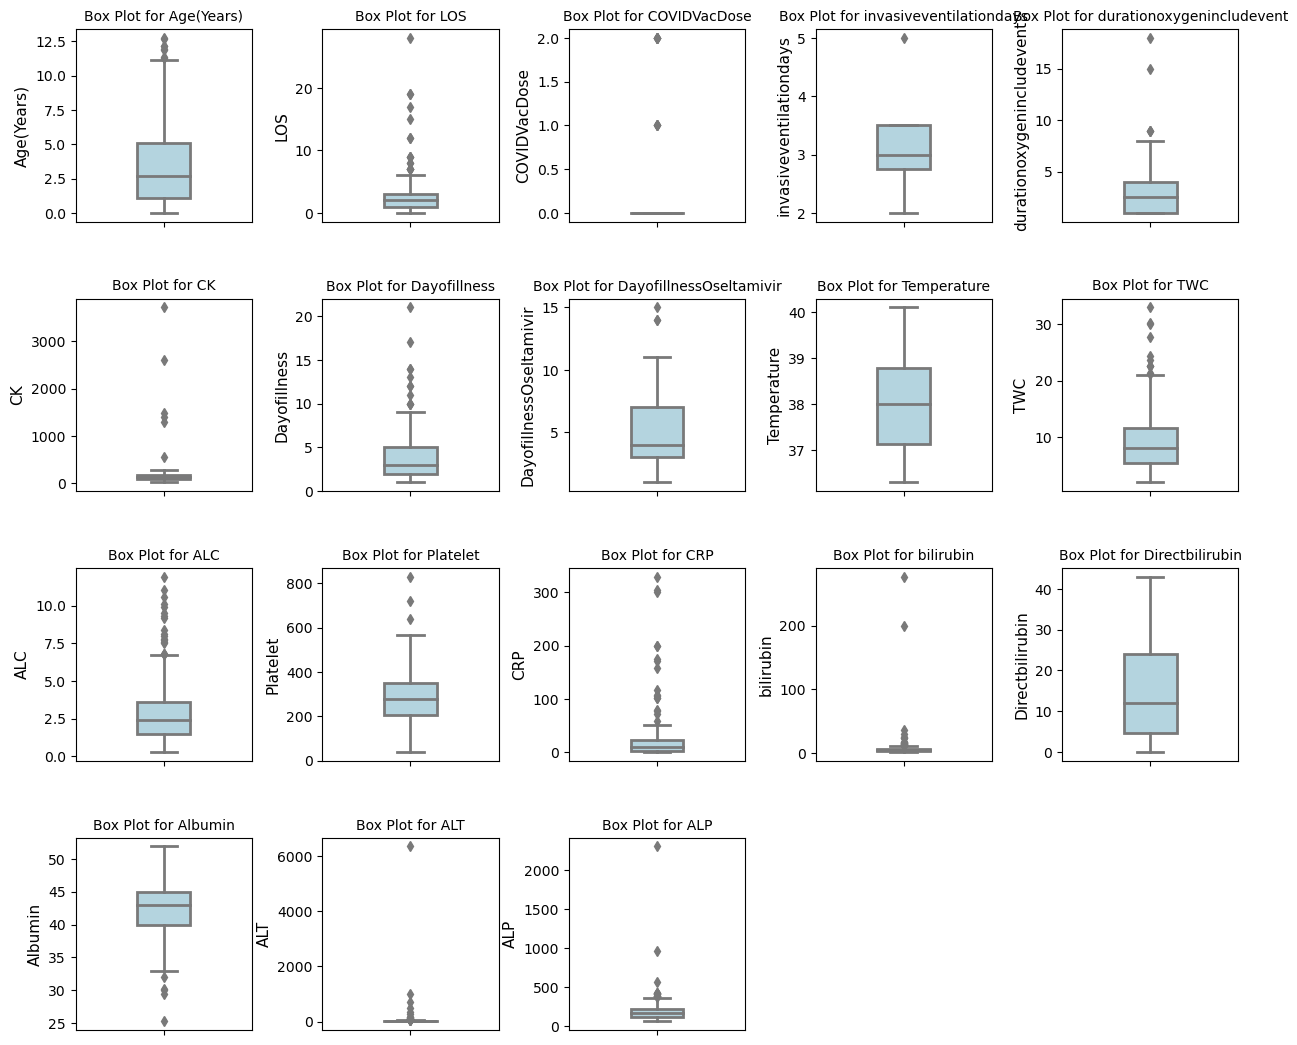

Age(Years)                   2.649007
LOS                          5.629139
COVIDVacDose                 3.311258
invasiveventilationdays      0.331126
durationoxygenincludevent    1.655629
CK                           1.986755
Dayofillness                 3.642384
DayofillnessOseltamivir      0.993377
Temperature                  0.000000
TWC                          3.642384
ALC                          5.960265
Platelet                     0.993377
CRP                          5.629139
bilirubin                    6.291391
Directbilirubin              0.000000
Albumin                      1.655629
ALT                          7.284768
ALP                          4.635762
dtype: float64
                     Variable  Lower Bound  Upper Bound  Minimum Value  \
0                  Age(Years)    -5.034589    11.225685       0.016438   
1                         LOS    -2.000000     6.000000       0.000000   
2                COVIDVacDose     0.000000     0.000000       0.000000   
3    

In [3]:
## DATA PREPROCESSING ##
# check for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

# check for outliers
cont_variables = df.columns[82:100]

# Create individual horizontal box plots for each continuous variable
plt.figure(figsize=(15, 20))
for i, column in enumerate(cont_variables, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=df[column], width=0.3, color='lightblue', linewidth=2)
    plt.title(f'Box Plot for {column}', fontsize=10)
    plt.ylabel(column, fontsize=11)

# Adjust layout to prevent overlapping
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the horizontal and vertical spacing
plt.show()

outlier_threshold = 1.5
# Calculate the percentage of outliers for each column
outliers_percentage = ((df[cont_variables] < df[cont_variables].quantile(0.25) - outlier_threshold * (df[cont_variables].quantile(0.75) - df[cont_variables].quantile(0.25))) |
                       (df[cont_variables] > df[cont_variables].quantile(0.75) + outlier_threshold * (df[cont_variables].quantile(0.75) - df[cont_variables].quantile(0.25)))).mean() * 100

# Calculate statistics for each continuous variable
statistics = []

for column in cont_variables:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    min_value = df[column].min()
    max_value = df[column].max()

    statistics.append({
        'Variable': column,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Minimum Value': min_value,
        'Maximum Value': max_value
    })

# Create a DataFrame from the list of dictionaries
statistics_centiles = pd.DataFrame(statistics)


print(outliers_percentage)
print(statistics_centiles)

NOTE: 
a. no duplicates 

b. outliers
all outlying data were not typo errors.
not recommended to capped the extreme outliers for CRP, ALT, ALP to the upper bound as the upper bounds of these variables were in normal range. May need to accept these outliers as natural outliers 

In [14]:
# check for missing vales 
columns_to_check_missing = df.columns[6:100]

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print("\nPercentage Missing (Last 20):\n", percentage_missing.tail(13))



Percentage Missing (Last 20):
 CK                         80.132450
Dayofillness                0.000000
DayofillnessOseltamivir    46.688742
Temperature                 0.000000
TWC                         4.304636
ALC                         7.615894
Platelet                    4.635762
CRP                        50.000000
bilirubin                  38.079470
Directbilirubin            98.675497
Albumin                    36.423841
ALT                        35.761589
ALP                        35.099338
dtype: float64


NOTE: Suggest to drop CK, CRP, direct bilirubin from the analysis (missing values above 50%)

if modelling is required for this project, imputations is best to be done for variables: TWC, ALC, Platelet, bilirubin, albumin, ALT, ALP

otherwise will employ pairwise deletion during analysis.

Kolmogorov–Smirnov test for Age(Years): p-value = 0.000
Kolmogorov–Smirnov test for LOS: p-value = 0.000
Kolmogorov–Smirnov test for COVIDVacDose: p-value = 0.000
Kolmogorov–Smirnov test for invasiveventilationdays: p-value = 0.000
Kolmogorov–Smirnov test for durationoxygenincludevent: p-value = 0.000
Kolmogorov–Smirnov test for CK: p-value = 0.000
Kolmogorov–Smirnov test for Dayofillness: p-value = 0.000
Kolmogorov–Smirnov test for DayofillnessOseltamivir: p-value = 0.000
Kolmogorov–Smirnov test for Temperature: p-value = 0.000
Kolmogorov–Smirnov test for TWC: p-value = 0.000
Kolmogorov–Smirnov test for ALC: p-value = 0.000
Kolmogorov–Smirnov test for Platelet: p-value = 0.000
Kolmogorov–Smirnov test for CRP: p-value = 0.000
Kolmogorov–Smirnov test for bilirubin: p-value = 0.000
Kolmogorov–Smirnov test for Directbilirubin: p-value = 0.008
Kolmogorov–Smirnov test for Albumin: p-value = 0.000
Kolmogorov–Smirnov test for ALT: p-value = 0.000
Kolmogorov–Smirnov test for ALP: p-value = 0.0

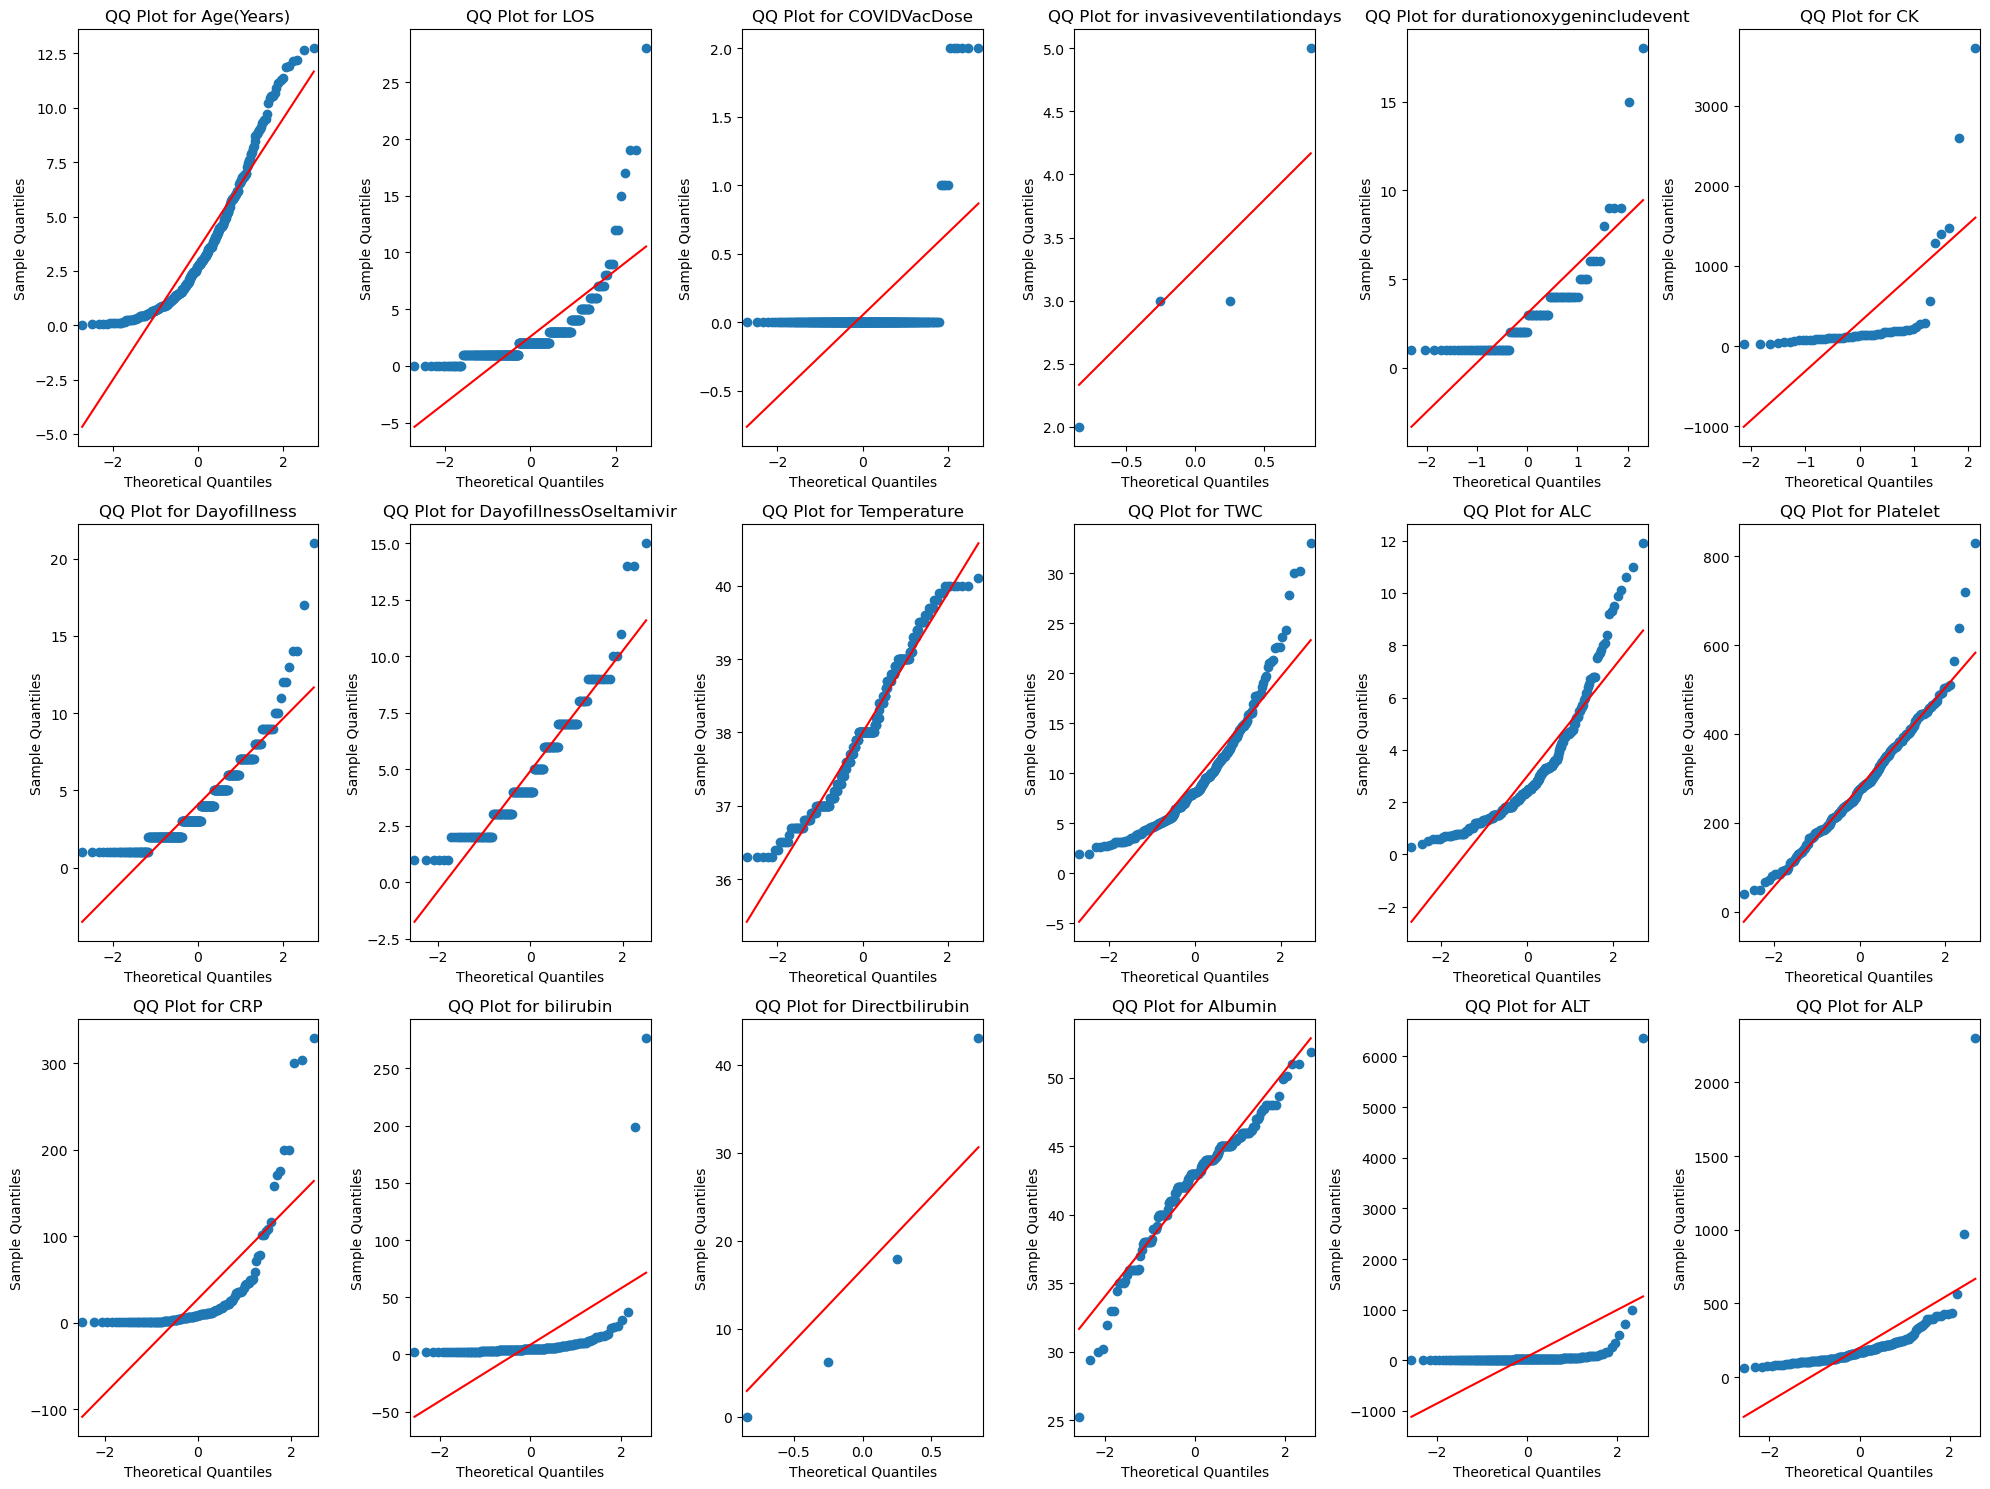

In [5]:
# check for normality
# Check normality using Kolmogorov–Smirnov test and QQ plot
for column in cont_variables:
    # Exclude missing values before conducting tests
    data = df[column].dropna()

    # Kolmogorov–Smirnov test
    kstest_result = stats.kstest(data, 'norm')
    p_value_formatted = "{:.3f}".format(kstest_result.pvalue)
    print(f'Kolmogorov–Smirnov test for {column}: p-value = {p_value_formatted}')

# Combine QQ plots into subplots
num_plots = len(cont_variables)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # Adjust to include the last row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

for i, column in enumerate(cont_variables):
    row = i // num_cols
    col = i % num_cols

    # QQ plot
    sm.qqplot(df[column].dropna(), line='s', ax=axes[row, col])
    axes[row, col].set_title(f'QQ Plot for {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Note:
all continuous varaibles were non-normally distributed (KS-test p <0.005, non-linear QQplots)